# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0381 Михайлов Виктор и Прохоров Борис. Вариант №8


## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

### Классификация сигналов

1. Периодические и непериодические сигналы
2. Детерменированные и случайные сигналы
3. Сигналы с конечной (ограниченной) и бесконечной (неограниченной) энергией
4. Аналоговые, дискретные и цифровые сигналы

### Частота Найквиста

Гармонический сигнал может быть представлен дискретными отсчётами, если его частота не превышает половины частоты дискретизации:

$f_N = {{f_d} \over 2} = {1 \over {2T}}$  
 $\omega_N = {\omega_d \over 2} = {\pi \over T}$,

где $f_N$ - частота гармонического сигнала, $f_d$ - частота дискретизации.

В зависимости от соотношения между частотой дискретизируемого гармонического сигнала и частотой Найквиста возможны три случая:

1. Если частота гармонического сигнала меньше чатсоты Найквиста, дискретные отсчёты позволяют правильно восстановить аналоговый сигнал.
2. Если частота гармонического сигнала равна частоте Найквиста, то дискретные отсчёты позволяют восстановить аналоговый гармонический сигнал с той же частотой, но амплитуда и фаза восстановленного сигнала могут быть искажены.
3. Если частота гармонического сигнала больше частоты Найквиста, восстановленный по дискретным отсчётам аналоговый сигнал будет также гармоническим, но с иной частотой. Данный эффект носит навзвание появления ложных частот.

### Энергия и мощность сигнала

Энергия: $E = \int\limits_0^T s^2 (t)dt$

Мгновенная мощность: $p(t) = s^2 (t)$

Средняя мощность: $P_{cp} = {1 \over T} \int\limits_0^T s^2 (t)dt$

### Некоторые специальные виды детерминированных дискретных сигналов

Единичный цифровой импульс: $\delta_d (k) = \begin{equation*}
\begin{cases}
   0, k \neq 0\\
   1, k = 0
 \end{cases}
\end{equation*}$

Дискретный единичный скачок: $\sigma_d (k) = \begin{equation*}
\begin{cases}
   0, k < 0\\
   1, k \geq 0
 \end{cases}
\end{equation*}$

Дискретная экспоненциальная функция: $s(k) = \begin{equation*}
\begin{cases}
   0, k < 0\\
   a^k, k \geq 0
 \end{cases}
\end{equation*}$

Дискретная затухающая синусоида: $s(k) = a^k \cos(k\omega + \varphi)$

### Характеристики дискретного сигнала (последовательности отсчётов)

1. Среднее значение
2. Мощность - сумма квадратов значений отсчётов
3. Средняя мощность
4. Автокорреляционная функция (АКФ):

$R_s (m) = {1 \over {N - m}}\sum\limits_{n=0}^{N-m-1} s(n) s(n+m), 0 \leq m \leq (N-1)$

5. Автоковариационная функция:

$r_s (m) = {1 \over {N- m}} \sum\limits_{n=0}^{N-m-1} [s(n) - \mu_s][s(n+m) - \mu_s], 0 \leq m \leq (N-1)$

## Выполнение работы

Начальные условия:

|Переменная|Назначение|Значение|Идентификатор|
|    :----:   |    :----:   |    :----:   |    :----:   |
|$N_{бр}$  |Номер бригады           |8                    |Nb|
|$N$       |Длина последовательности|33                   |N|
|$T$       |Период дискретизации    |0.0015                |T|
|$a$       |Основание экспоненты    |0.84               |a |
|$C$       |Амплитуда гармонического сигнала       |4|C      |  
|$\hat\omega_0$(рад)|Частота гармонического сигнала|π/9|w0|
|$m$|Задержка|8| m|

Импорт необходимых библиотек и определение начальных условий:

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

initialConditions = {
    'Nb': 8,
    'N': 33,
    'T': 0.0015,
    'a': 0.84,
    'C': 4,
    'w0': pi/9,
    'm': 8
}

1. Смоделируем единичный цифровой импульс $\delta_d (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$.

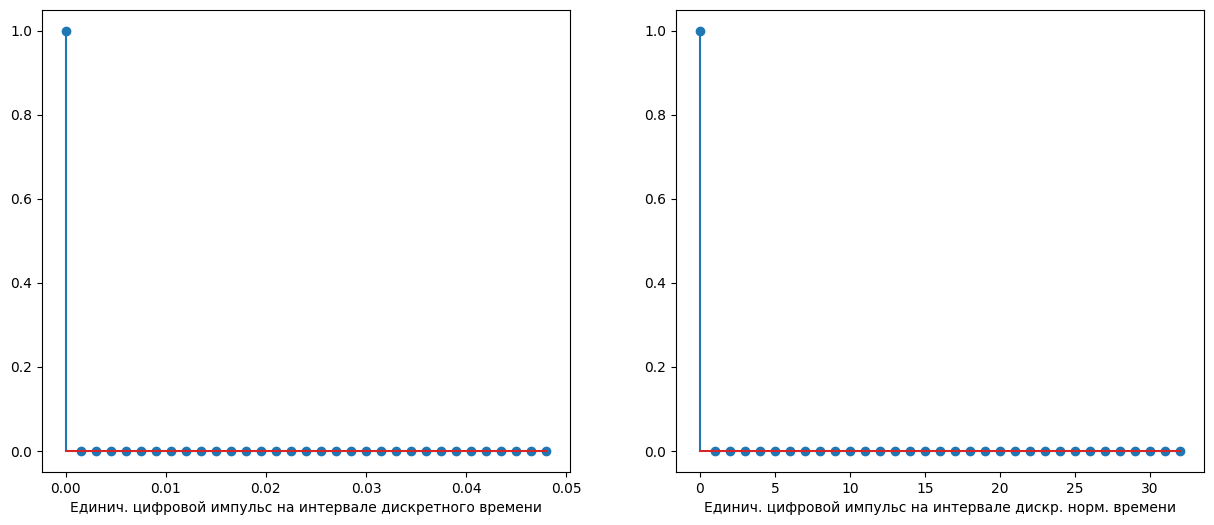

In [ ]:
nT = np.linspace(0, (initialConditions['N'] - 1) * initialConditions['T'], initialConditions['N'])
n = np.linspace(0, initialConditions['N'] - 1, initialConditions['N'])

# print(nT, n)

# Единичный цифровой импульс
def ddf(k, m=0):
  var = np.zeros_like(k)
  var[k == m] = 1
  return var

fig = plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 2, 1)  # row 1, column 1, count 1

ax1.stem(nT, ddf(nT))
ax1.set_xlabel('Единич. цифровой импульс на интервале дискретного времени')

ax2 = plt.subplot(1, 2, 2)  # row 1, column 1, count 1
ax2.stem(n, ddf(n))
ax2.set_xlabel('Единич. цифровой импульс на интервале дискр. норм. времени')

plt.show()

Пояснить:

a. Взаимосвязь между дискретным и дискретным нормированным временем.

b. Различие между единичным цифровым импульсом и дельта-функцией.

Ответ:

a. Дискретное нормированной время — частный случай дискретного времени, когда T=1.

b. Единичный цифровой импульс — дискретный аналог дельта-функции. Разница в том, что в точке 0 единичный цифровой импульс равен 1, а дельта-функция равна бесконечности.

2. Смоделируем дискретный единичный скачок $\sigma_d (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$:

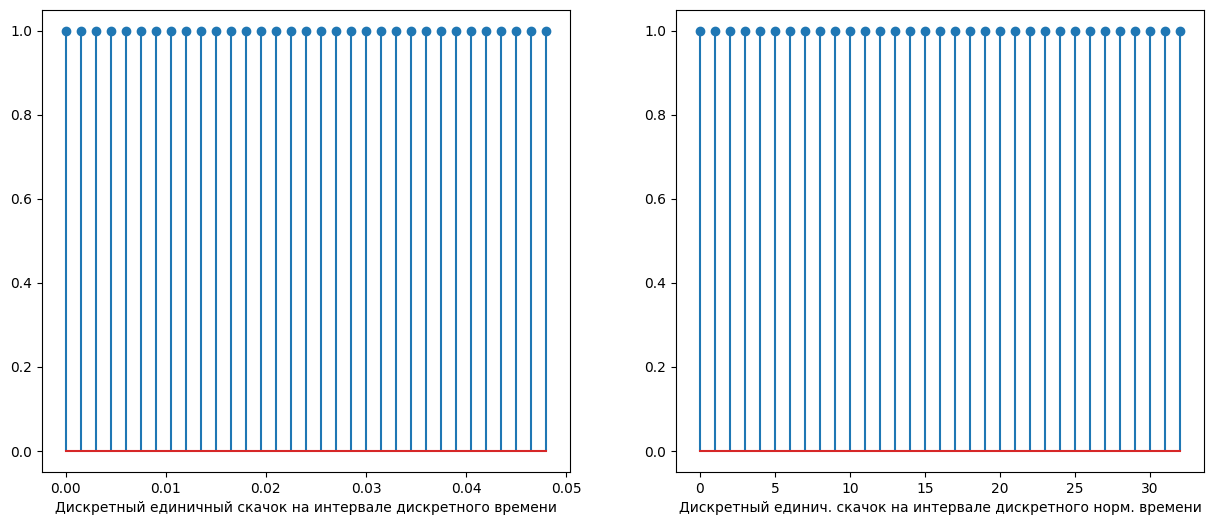

In [ ]:
# Дискретный единичный скачок
def hsf(k, m=0):
  var = np.zeros_like(k)
  var[k >= m] = 1
  return var


fig = plt.figure(figsize=(15, 6))

ax1 = plt.subplot(1, 2, 1)  # row 1, column 1, count 1
ax1.stem(nT, hsf(nT))
ax1.set_xlabel("Дискретный единичный скачок на интервале дискретного времени")

ax2 = plt.subplot(1, 2, 2)  # row 1, column 1, count 1
ax2.stem(n, hsf(n))
ax2.set_xlabel("Дискретный единич. скачок на интервале дискретного норм. времени")

plt.show()

Пояснить:

a. Соответствие между дискретным и аналоговым единичными скачками.

b. Чему равна частота дискретизации дискретного единичного скачка.

Ответ:

a. Дискретный единичный скачок — это дискретный аналог функции Хэвисайда.

b. Частота дискретизации дискретного единичного скачка: $f_d = \frac{1}{T}$

In [ ]:
1/initialConditions['T']

666.6666666666666

3. Смоделируем дискретную экспоненциальную функцию $s_1 (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$.

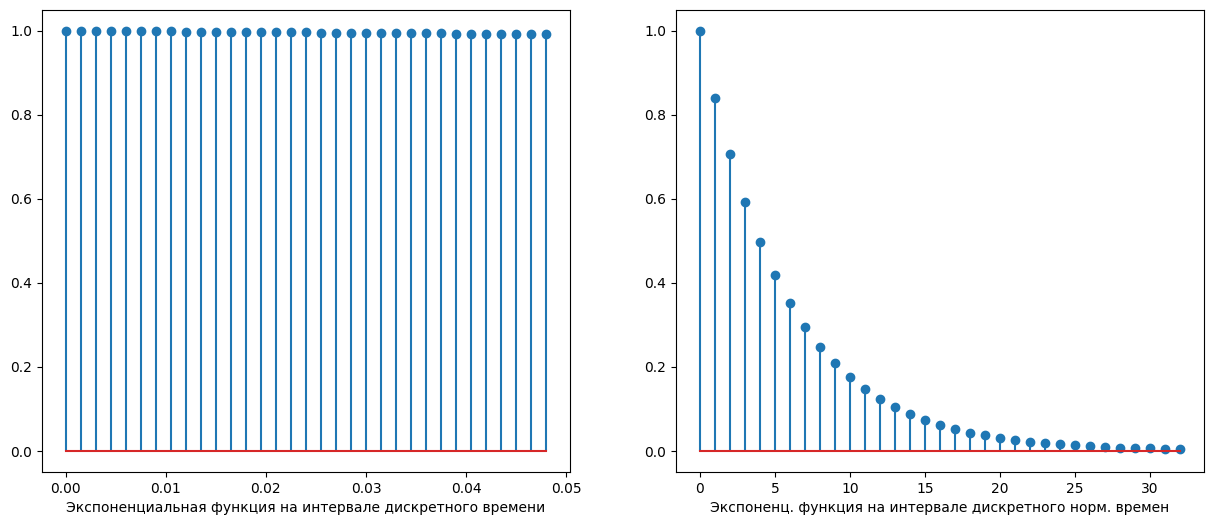

In [ ]:
def s(k, m=0):
  y = np.zeros_like(k)
  sk = np.float_power(initialConditions['a'], k[k >= m] - m)
  y[k >= m] = sk
  return y

fig = plt.figure(figsize=(15, 6))

ax1 = plt.subplot(1, 2, 1)  # row 1, column 1, count 1
ax1.stem(nT, s(nT))
ax1.set_xlabel("Экспоненциальная функция на интервале дискретного времени")

ax2 = plt.subplot(1, 2, 2)  # row 1, column 1, count 1
ax2.stem(n, s(n))
ax2.set_xlabel("Экспоненц. функция на интервале дискретного норм. времен")

plt.show()

Пояснить:

Пояснить соответствие между дискретной и аналоговой экспонентами

Ответ:

Экспоненты соотвествуют друг другу на промежутке k>=0, но при k<0 дискретная экспонента принимает значение равное 0, а аналоговая — a^k

4. Смоделируем дискретный комплексный гармонический сигнал $s_2 (k) = C exp(j \hat\omega_0 k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0, N-1]$.

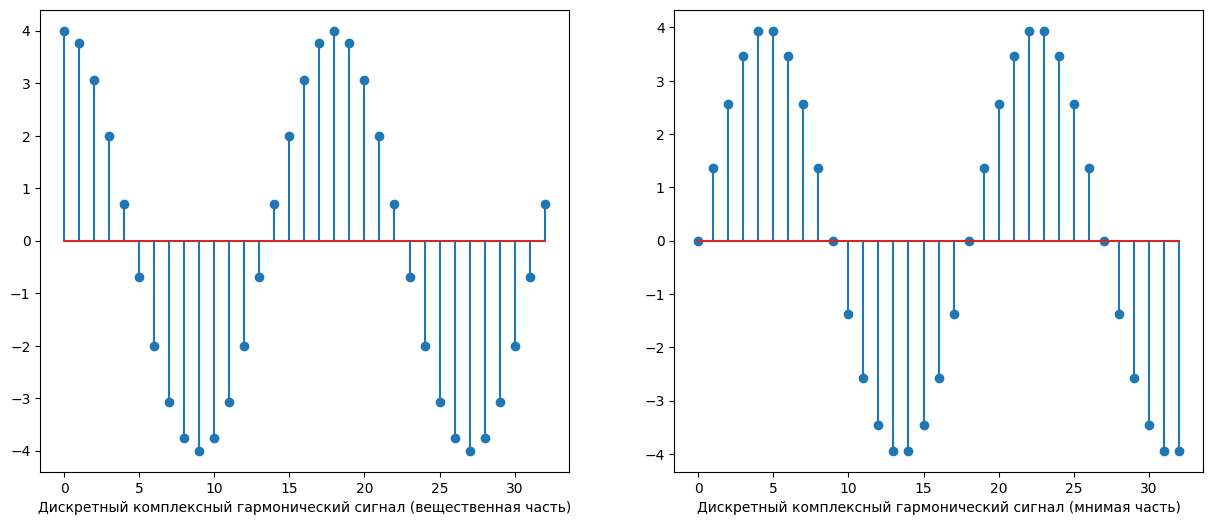

In [ ]:
# Дискретный комплексный гармонический сигнал
def s2(k, part):
    sk = initialConditions['C'] * np.exp(1j * initialConditions['w0'] * k)
    if part == 'real':
      sk = sk.real
    else:
      sk = sk.imag
    return sk

fig = plt.figure(figsize=(15, 6))

ax1 = plt.subplot(1, 2, 1)  # row 1, column 1, count 1
ax1.stem(n, s2(n, 'real'))
ax1.set_xlabel("Дискретный комплексный гармонический сигнал (вещественная часть)")

ax2 = plt.subplot(1, 2, 2)  # row 1, column 1, count 1
ax2.stem(n, s2(n, 'imaginary'))
ax2.set_xlabel("Дискретный комплексный гармонический сигнал (мнимая часть)")

plt.show()

Записать данный сигнал в виде комбинации двух вещественных последовательностей.

$s_2 (k) = C*exp(j\hat\omega_0k) = C(cos(j\hat\omega_0)+jsin(j\hat\omega_0))$

5. Выведем графики последовательностей $\delta_d (k), \sigma_d (k)$ и $s_1 (k)$, задержанных на m отсчетов, на интервале времени $n \in [0, N-1]$.

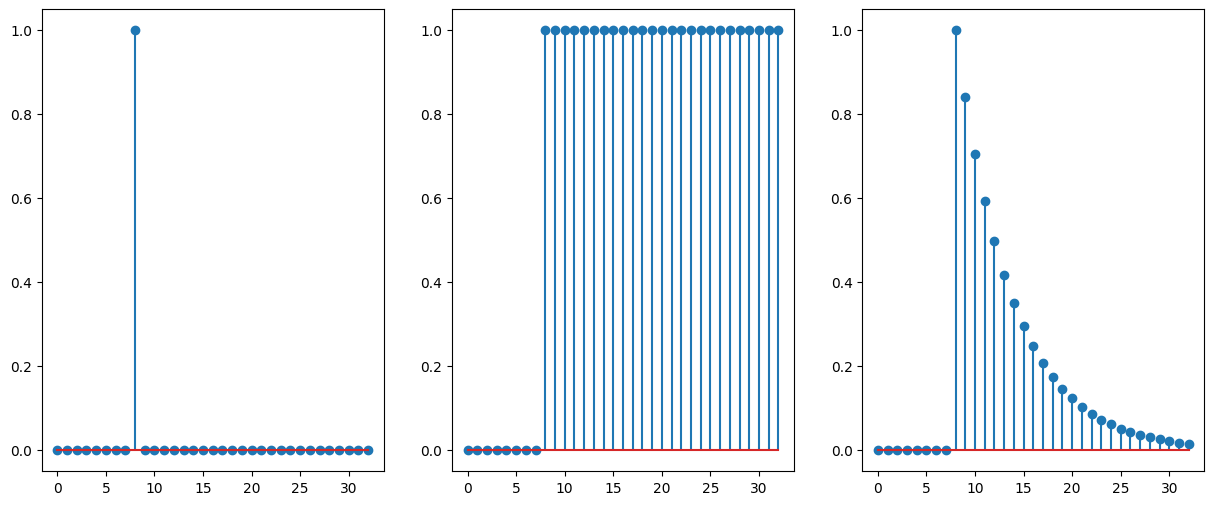

In [ ]:
fig = plt.figure(figsize=(15, 6))

ax1 = plt.subplot(1, 3, 1)  # row 1, column 1, count 1
ax1.stem(n, ddf(n, initialConditions['m']))

ax2 = plt.subplot(1, 3, 2)
ax2.stem(n, hsf(n, initialConditions['m']))

ax3 = plt.subplot(1, 3, 3)
ax3.stem(n, s(n, initialConditions['m']))

plt.show()

Формулы задержанных последовательностей:

1. Формула единичного импульса, задержанного на $m$ отсчётов: $\delta_d (k) = \begin{equation*}
\begin{cases}
   0, k \neq 0\\
   1, k = m
 \end{cases}
\end{equation*}$

2. Формула единичного скачка, задержанного на $m$ отсчётов: $\sigma_d (k) = \begin{equation*}
\begin{cases}
   0, k < m\\
   1, k \geq m
 \end{cases}
\end{equation*}$

3. Формула дискретной экспоненциальной функции, задержанной на $m$ отсчётов: $s_1 (k) = \begin{equation*}
\begin{cases}
   0, k < m\\
   a^{k-m}, k \geq m
 \end{cases}
\end{equation*}$

## Выводы

В ходе практической работы были изучены математические описания дискретных сигналов и получены навыки использования программных средств их моделирования. В этих целях произведены следующие действия:
1. Был исследован цифровой единичный импульс на интервалах дискретного и дискретного нормированного времени и на его примере изучена связь между интервалами.
2. Был исследован цифровой единичный скачок на интервалах дискретного и дискретного нормированного времени, его частота дискретизации и соответствие с аналоговым единичным скачком.
3. Была исследована дискретная экспонента на интервалах дискретного и дискретного нормированного времени и её соответствие с аналоговой экспонентой.
4. Был исследован дискретный комплексный гармонический сигнал на интервале дискретного времени и переписан в виде комбинации двух вещественных последовательностей.
5. Были исследованы задержанные последовательности на интервале дискретного времени и записаны их формулы.